# Perceptron

### Download Iris dataset
Follow the link and download the Iris dataset:  
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.linear_model import Perceptron

In [2]:
class _Perceptron:

    def __init__(self, alpha=0.0001, max_iter=300):
        self.alpha = alpha
        self.max_iter = max_iter
        self.intercept_ = None
        self.coef_ = None
        self.iter = None

    def fit(self, X, y):
        X = np.array(X)
        y = y.reshape(-1, 1)
        self.intercept_ = 0
        self.coef_ = np.zeros((len(X.T), 1))
        self.iter = 0

        while True:
            self.iter += 1
            if self.iter > self.max_iter:
                break

            old_b, old_w = [self.intercept_, self.coef_]
            
            for i in range(len(X)):
                
                z = self._z(X[i])
                y_cap = self._phi(z)
                
                delta_b = self.alpha * (y[i] - y_cap)
                delta_w = self.alpha * (y[i] - y_cap) * X[i].reshape(-1, 1)
                self.intercept_ += delta_b
                self.coef_ += delta_w
            
            if old_b == self.intercept_ and np.array_equal(old_w, self.coef_):
                break

        return self
    
    # weighted input function
    def _z(self, X):
        return X.dot(self.coef_) + self.intercept_
    
    # activation function
    def _phi(self, z):
        return np.where(z < 0, -1, 1)

    def predict(self, X):
        z = self._z(X)
        y_cap = self._phi(z)
        return y_cap.reshape(1, -1)[0]
    
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

### Import

In [3]:
X = pd.read_csv('datasets/iris.data.csv')
X = X[X['class'].isin(['Iris-setosa', 'Iris-versicolor'])]
X['class'] = np.where(X['class'] == 'Iris-setosa', -1, 1)

In [4]:
x_fields = ['sepal length', 'petal width']

### Slicing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X[x_fields], np.array(X['class']), test_size=0.2)

### Fitting

In [6]:
model = _Perceptron().fit(X_train, y_train)

### Performance

In [7]:
print('total iterations', model.iter)
print('train set accuracy', model.score(X_train, y_train))
print('test set accuracy', model.score(X_test, y_test))

total iterations 2
train set accuracy 1.0
test set accuracy 1.0


### Scatterplot

In [8]:
x=np.array(X_test).T[0]
y=np.array(X_test).T[1]

In [9]:
hue=np.where(model.predict(X_test) == -1, 'Iris-setosa', 'Iris-versicolor')

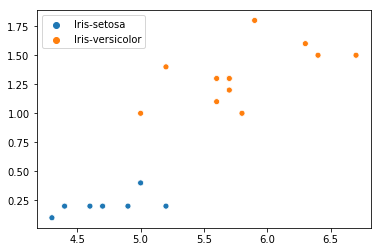

In [10]:
sns.scatterplot(x=x, y=y, hue=hue)